<a href="https://colab.research.google.com/github/roembrandt/Python/blob/master/my_eco_anal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dominican Republic Economic Analytics
Exports to Dominican Republic from U.S. by State

This notebook was created in an effort to further
my data analytics career

<img src="https://static.vecteezy.com/system/resources/thumbnails/002/910/315/small/analytics-data-analysis-strategy-statistic-concept-photo.jpg" width="500" height="200" />


In [ ]:
!pip install fredapi > /dev/null
!pip install pandas > /dev/null
!pip install numpy > /dev/null
!pip install matplotlib > /dev/null
!pip install plotly > /dev/null
!pip install time > /dev/null
!pip install google-colab > /dev/null
!pip install plotly > /dev/null




### 1. Import Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time
from fredapi import Fred # you have to pip install each time

### 2. Create The Fred Reference

In [39]:
# access colab userdata
from google.colab import userdata

# load your api key stored in colab - obtain from https://fred.stlouisfed.org/
fred_key = userdata.get('fred_key')

# instantiate fred using your key
fred = Fred(api_key=fred_key)

### 3. Search for all series like '%Exports to Dominican%'

In [40]:
# this will search categories for a 'title' containing the search string
sp_search = fred.search('Value of Exports to Dominican Republic from', order_by='popularity')

#sp_search = fred.search('DOMA052SCEN', order_by='popularity') - also works with seriesID
# create list to store results
my_series = []

# build list using results
for id in sp_search.index:
    my_series.append(id)

# commented
# print(my_series)

## ['VTDOMA052SCEN', 'RIDOMA052SCEN', 'TXDOMA052SCEN', 'MIDOMA052SCEN', 'CTDOMA052SCEN', 'ILDOMA052SCEN', 'PRDOMA052SCEN', 'CODOMA052SCEN', 'IADOMA052SCEN', 'AKDOMA052SCEN', 'NDDOMA052SCEN', 'DCDOMA052SCEN', 'ALDOMA052SCEN', 'AZDOMA052SCEN', 'NYDOMA052SCEN', 'MODOMA052SCEN', 'NVDOMA052SCEN', 'WYDOMA052SCEN', 'SCDOMA052SCEN', 'KSDOMA052SCEN', 'DEDOMA052SCEN', 'HIDOMA052SCEN', 'KYDOMA052SCEN', 'NEDOMA052SCEN', 'ORDOMA052SCEN', 'TNDOMA052SCEN', 'GADOMA052SCEN', 'IDDOMA052SCEN', 'VADOMA052SCEN', 'NJDOMA052SCEN', 'OHDOMA052SCEN', 'ARDOMA052SCEN', 'CADOMA052SCEN', 'FLDOMA052SCEN', 'INDOMA052SCEN', 'LADOMA052SCEN', 'MEDOMA052SCEN', 'MDDOMA052SCEN', 'MADOMA052SCEN', 'MNDOMA052SCEN', 'MSDOMA052SCEN', 'MTDOMA052SCEN', 'NHDOMA052SCEN', 'NMDOMA052SCEN', 'NCDOMA052SCEN', 'OKDOMA052SCEN', 'PADOMA052SCEN', 'SDDOMA052SCEN', 'VIDOMA052SCEN', 'UTDOMA052SCEN', 'WADOMA052SCEN', 'WVDOMA052SCEN', 'WIDOMA052SCEN']
## Displaying 53 series for value of exports to dominican.

### 4. Build a primary dataframe from each series item

In [41]:
# Define a list of dataset names (replace with your desired datasets)
# using the 'my_series' list, loop thru each and
# build a single dataframe from all series

# my_series = ["FLDOMA052SCEN"] ' hard code to 1 state for testing

data_list = []
for dataset in my_series:
  series_data = fred.get_series(dataset)  # load series data

  # Convert Series to DataFrame
  data = pd.DataFrame(series_data)

  # Add 'StateCode' actually seriesID that will be used
  # to identify the state later
  data = data.assign(StateCode=dataset)

  # Add 'Abbrev' column using first 2 chars of seriesID ("FLDOMA052SCEN")
  data = data.assign(Abbrev=dataset[0:2])

  # Append data to data_list
  data_list.append(data)


# Concatenate all data_list items into final_data dataframe
final_data = pd.concat(data_list)

# adds a new index (0,1,2,3....) and replaces year as the index
final_data.reset_index(inplace=True)

# rename the old column header 'index' to 'Date'
final_data.rename(columns={'index': 'Date'}, inplace=True)

# rename the column header '0' to 'Dollars'
final_data.rename(columns={0: 'Dollars'}, inplace=True)

# replace null values in dollars with 0
final_data.fillna(0, inplace=True)



#print(data_list)

#### output dataframe to flat file ####
# Assuming your DataFrame is named 'df'
# with open("output2.txt", "w") as f:
#   # Get DataFrame as a string representation (adjust separator as needed)
#   df_string = final_data.to_csv(sep='\t', index=False)  # Use tabs for separation
#   f.write(df_string)

# print("DataFrame contents written to output.txt (tab-separated)")

#### output list to flat file ####
# with open("output.txt", "w") as f:
#   for item in data_list:
#     f.write(str(item) + "\n")
# print("List contents written to output.txt"



### 5. Take a look at the data

In [44]:
final_data.head()
print(final_data.query('State == "Puerto Rico"'))
# final_data.tail()
# final_data.columns
# final_data.info()
# final_data.describe()
# final_data['Date'].unique()


<DatetimeArray>
['1997-01-01 00:00:00', '1998-01-01 00:00:00', '1999-01-01 00:00:00',
 '2000-01-01 00:00:00', '2001-01-01 00:00:00', '2002-01-01 00:00:00',
 '2003-01-01 00:00:00', '2004-01-01 00:00:00', '2005-01-01 00:00:00',
 '2006-01-01 00:00:00', '2007-01-01 00:00:00', '2008-01-01 00:00:00',
 '2009-01-01 00:00:00', '2010-01-01 00:00:00', '2011-01-01 00:00:00',
 '2012-01-01 00:00:00', '2013-01-01 00:00:00', '2014-01-01 00:00:00',
 '2015-01-01 00:00:00', '1992-01-01 00:00:00', '1993-01-01 00:00:00',
 '1994-01-01 00:00:00', '1995-01-01 00:00:00', '1996-01-01 00:00:00',
 '2016-01-01 00:00:00', '2017-01-01 00:00:00']
Length: 26, dtype: datetime64[ns]

### 6. Load State/Abbrev data from flatfile

In [45]:
# Path to your CSV file
csv_file = "/content/sample_data/state_abbrev.csv"

# Read CSV into a DataFrame
df = pd.read_csv(csv_file)

# Convert DataFrame to dictionary
state_names = df.set_index('Abbreviation')['State'].to_dict()

# Manually Add Puerto Rico - or you can put it into the flatfile
state_names['PR'] = 'Puerto Rico'

# display data
print(state_names)

### option to load the following directly into the dict state_names =
### stored {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'DC': 'District of Columbia', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming', 'PR': 'Puerto Rico'}



{'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'DC': 'District of Columbia', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming', 'PR': 'Puerto Rico'}


### 7. Add a new field to final_data consisting of a map with state_names

In [46]:
final_data['State'] = final_data['Abbrev'].map(state_names)

### 7a. Review updated dataframe

In [56]:
#final_data.head()
print(final_data.query('State == "Arkansas"'))
# final_data.tail()
# final_data.columns
# final_data.info()
# final_data.describe()
# final_data['Dates'].unique()


          Date     Dollars      StateCode Abbrev     State
726 1992-01-01   1361149.0  ARDOMA052SCEN     AR  Arkansas
727 1993-01-01         0.0  ARDOMA052SCEN     AR  Arkansas
728 1994-01-01         0.0  ARDOMA052SCEN     AR  Arkansas
729 1995-01-01         0.0  ARDOMA052SCEN     AR  Arkansas
730 1996-01-01         0.0  ARDOMA052SCEN     AR  Arkansas
731 1997-01-01   6579755.0  ARDOMA052SCEN     AR  Arkansas
732 1998-01-01         0.0  ARDOMA052SCEN     AR  Arkansas
733 1999-01-01         0.0  ARDOMA052SCEN     AR  Arkansas
734 2000-01-01         0.0  ARDOMA052SCEN     AR  Arkansas
735 2001-01-01         0.0  ARDOMA052SCEN     AR  Arkansas
736 2002-01-01   4213027.0  ARDOMA052SCEN     AR  Arkansas
737 2003-01-01   4478001.0  ARDOMA052SCEN     AR  Arkansas
738 2004-01-01   6575335.0  ARDOMA052SCEN     AR  Arkansas
739 2005-01-01   4519442.0  ARDOMA052SCEN     AR  Arkansas
740 2006-01-01   4094763.0  ARDOMA052SCEN     AR  Arkansas
741 2007-01-01   5298543.0  ARDOMA052SCEN     AR  Arkans

### 8. Column Plot example using plotly

In [49]:
import plotly.express as px

# use a copy of final_data to plot on
# empty years are little or no data
df = pd.DataFrame(final_data)

# Column plot using Plotly
fig = px.bar(df, x='Date', y='Dollars', title='Dollars by Date')
fig.show()

### 9. Column Plot example using matplotlib

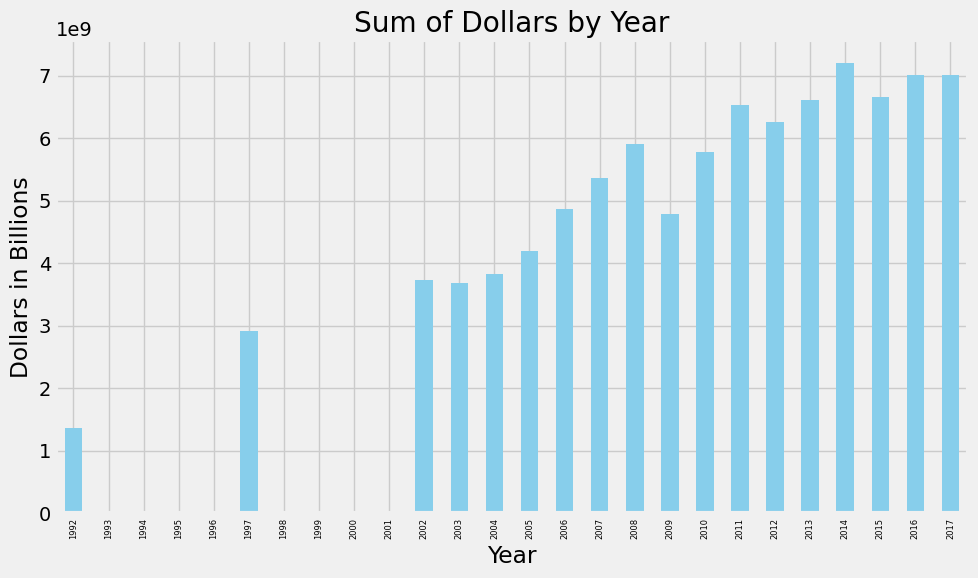

In [50]:
df = pd.DataFrame(final_data)

# Convert Date column to year
df['Year'] = df['Date'].dt.year

# Group by Year and calculate sum of Dollars
sum_dollars_per_year = df.groupby('Year')['Dollars'].sum()

# Plotting
plt.figure(figsize=(10, 6))
sum_dollars_per_year.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Dollars')
plt.title('Sum of Dollars by Year')
plt.xticks(fontsize=6)
plt.tight_layout()
plt.show()


### 10. Bar Plot example using matplotlib

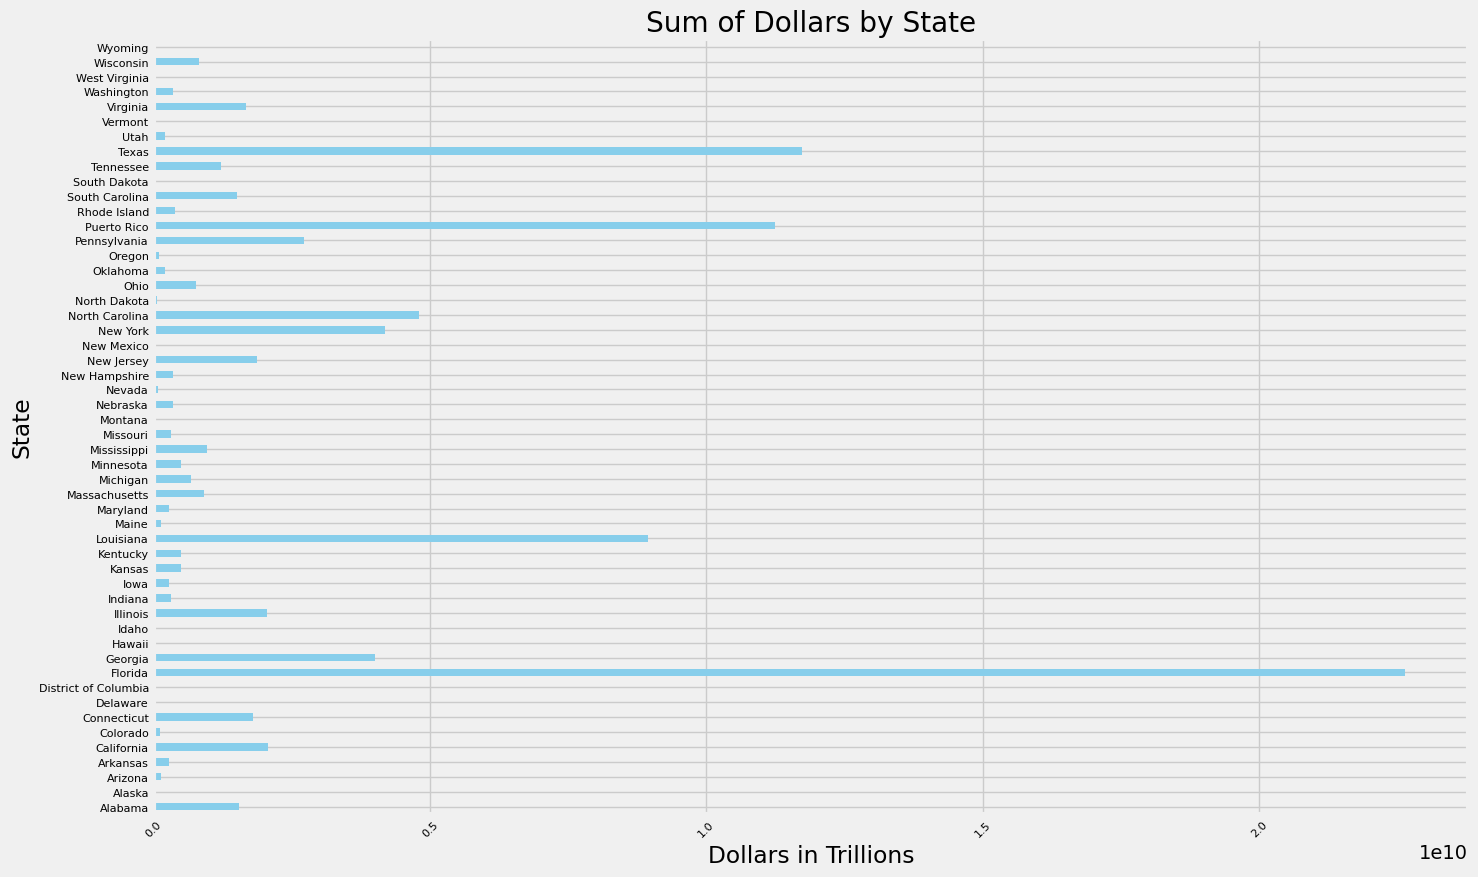

In [54]:
# Plotting

df = pd.DataFrame(final_data)

# Convert Date column to year
# df['Year'] = df['Date'].dt.year

# Group by Year and calculate sum of Dollars
sum_dollars_per_state = df.groupby('State')['Dollars'].sum()

# Plotting
plt.figure(figsize=(15, 9))
sum_dollars_per_state.plot(kind='barh', color='skyblue', fontsize=8)
plt.xlabel('Dollars')
plt.ylabel('State')
plt.title('Sum of Dollars by State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 11. Subplot example using matplotlib

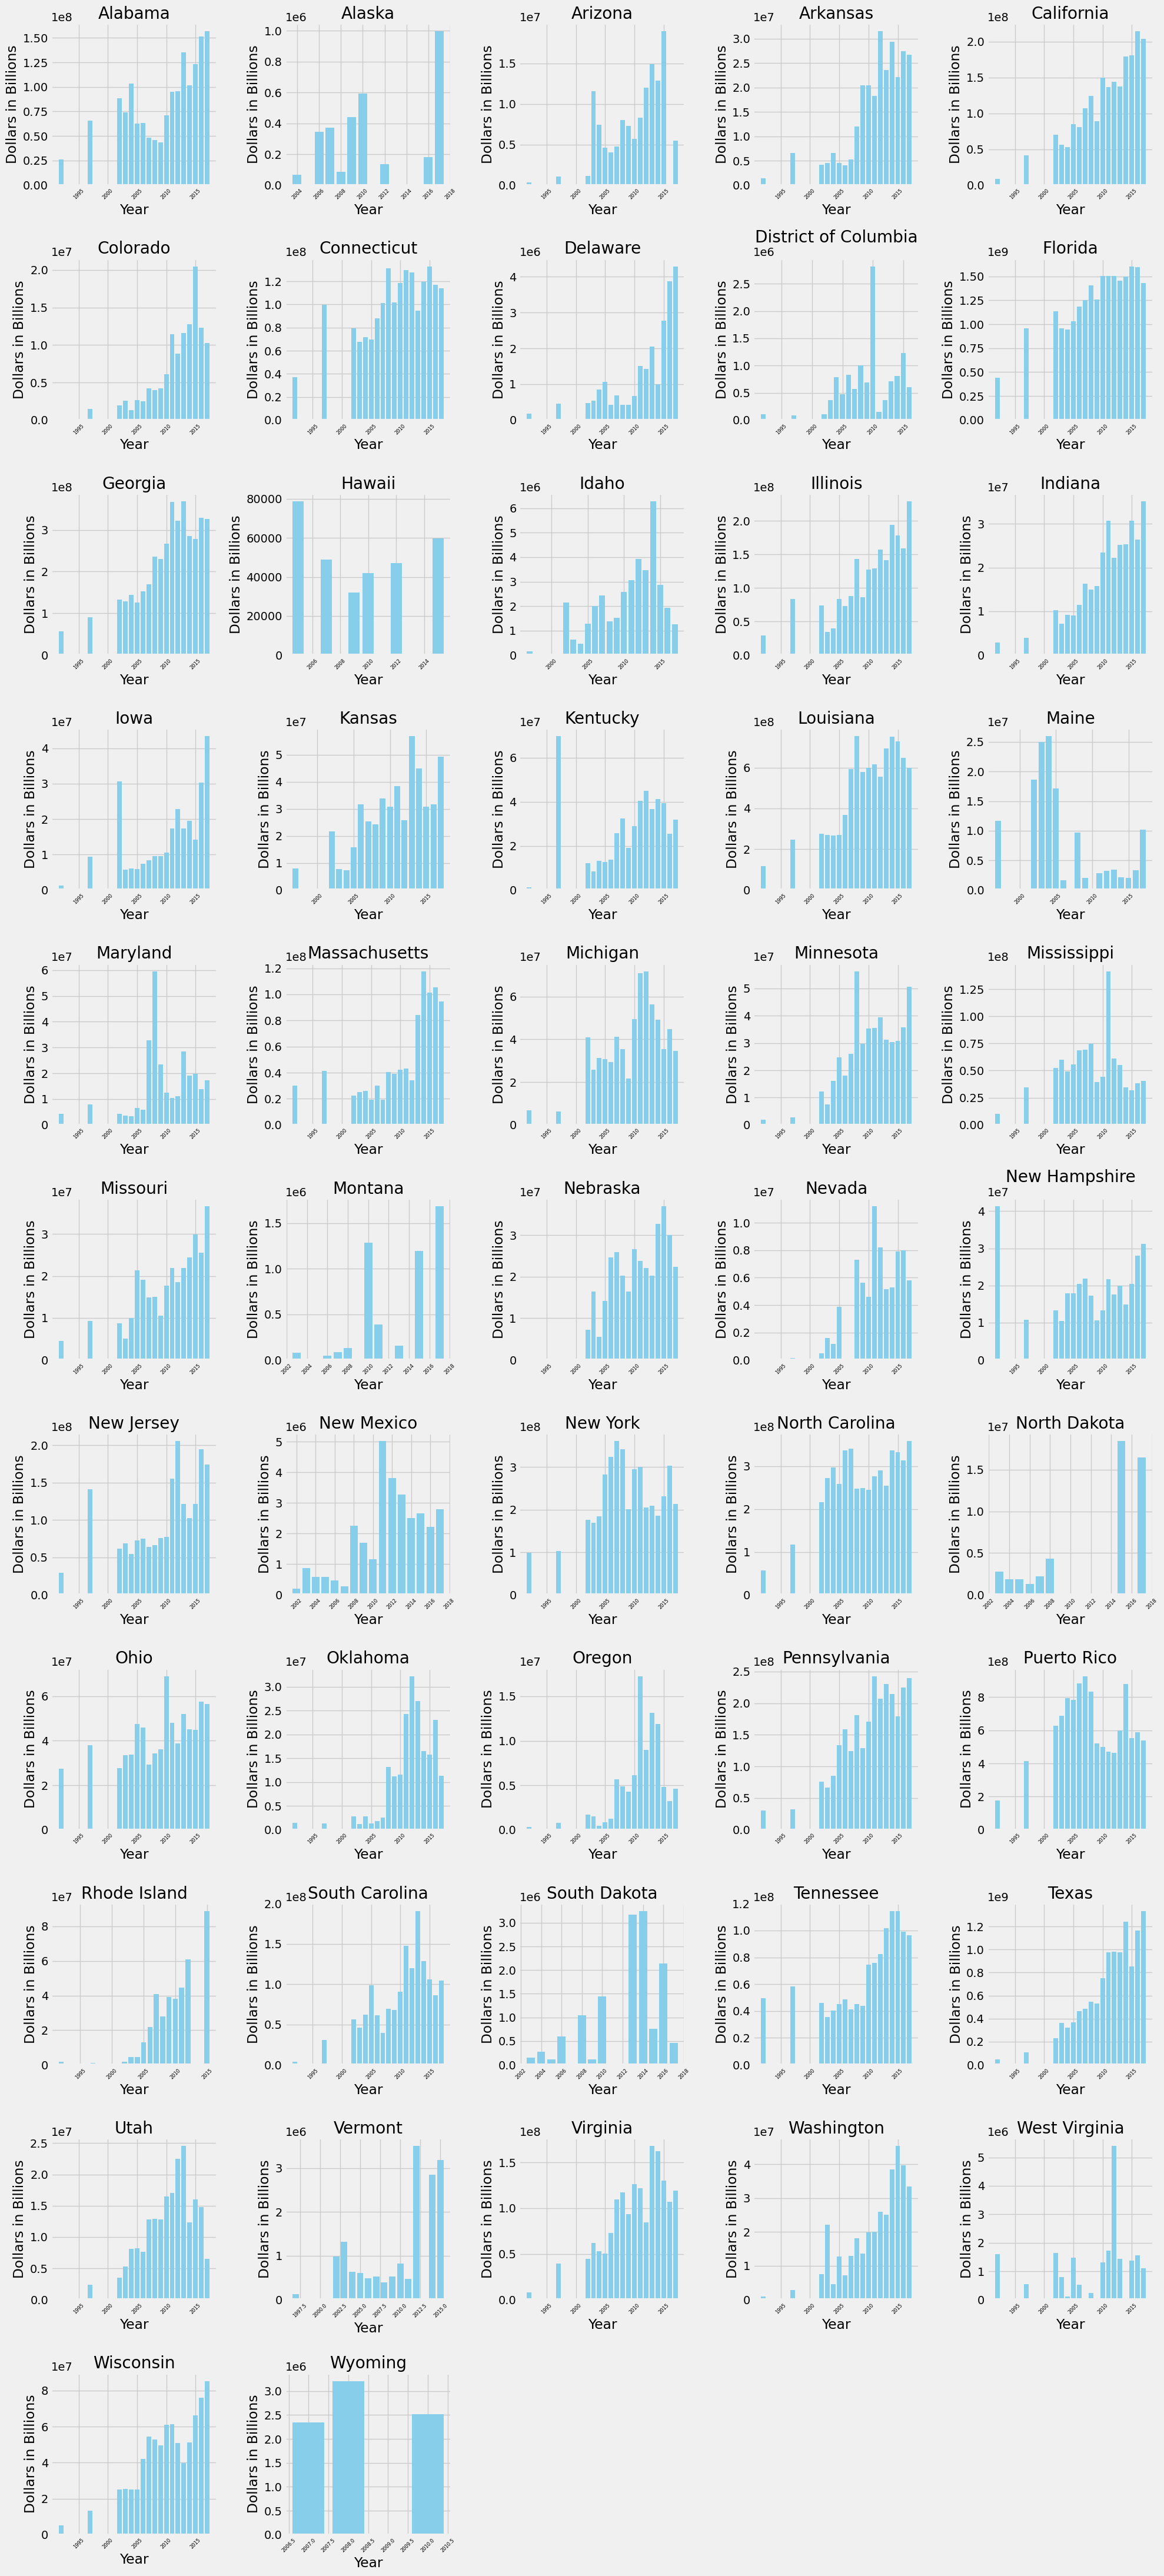

In [55]:
#
df = pd.DataFrame(final_data)

# Convert Date column to year
df['Year'] = df['Date'].dt.year

# Group by State and Year, and calculate sum of Dollars
sum_dollars_per_state_year = df.groupby(['State', 'Year'])['Dollars'].sum().reset_index()

# Plotting
states = sum_dollars_per_state_year['State'].unique() # pull unique states
num_states = len(states) # count of uniques
num_cols = 5 # set 5 as the number of subplots per row
num_rows = (num_states + num_cols - 1) // num_cols  # Calculate the number of rows needed

#
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4))

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, state in enumerate(states):
    state_data = sum_dollars_per_state_year[sum_dollars_per_state_year['State'] == state]
    axes[i].bar(state_data['Year'], state_data['Dollars'], color='skyblue')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Dollars in Billions')
    axes[i].set_title(f'{state}')
    axes[i].tick_params(axis='x', rotation=45, labelsize=6)
    # axes[i].tight_layout()

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### 12. Output Dataset

In [57]:
# csv
final_data.to_csv('final_data.csv', index=False)  # Set index=False to exclude row indices from the CSV

# # excel
# final_data.to_excel('final_data.xlsx', index=False)  # Set index=False to exclude row indices from the Excel file

# # json
# final_data.to_json('final_data.json', orient='records')  # orient='records' to export each row as a JSON object




### Future Consideration - Mapping

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load a sample shapefile (e.g., world boundaries)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world boundaries
world.plot()
plt.show()


In [34]:
import folium

# Create a map centered at a specific location
m = folium.Map(location=[45.5236, -122.6750], zoom_start=13)

# Add a marker
folium.Marker([45.5236, -122.6750], popup='Portland, OR').add_to(m)

# Display the map
m


In [36]:
import plotly.express as px

# Example data
data = {
    'latitude': [45.5236, 37.7749, 40.7128],
    'longitude': [-122.6750, -122.4194, -74.0060],
    'city': ['Portland', 'San Francisco', 'New York']
}
df = pd.DataFrame(data)

# Create a scatter mapbox
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", hover_name="city",
                        color_discrete_sequence=["fuchsia"], zoom=3, height=800)
fig.update_layout(mapbox_style="open-street-map")
fig.show()


In [37]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Create a map with PlateCarree projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines
ax.coastlines()

# Display the map
plt.show()


ModuleNotFoundError: No module named 'cartopy'

# More to Come!!
